# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Darmawan Jiddan
- **Email:** zdarmawan95@gmail.com
- **ID Dicoding:** ziddan2808

## Menentukan Pertanyaan Bisnis

- Bagaimana statistik demografi pelanggan?
- Bagaimana pendapatan yang dihasilkan berdasarkan kategori produk dan kota pelanggan?
- Apa saja produk unggulan yang dijual di setiap negara?
- Apa metode pembayaran yang paling umum digunakan oleh pelanggan?
- Bagaimana tren pendapatan bulanan dari waktu ke waktu?
- Berapa skor ulasan rata-rata untuk semua pesanan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# load customer table
customer_df = pd.read_csv("data\customers_dataset.csv")
customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [3]:
# load geolocation table
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# load order items table
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# load order payments table
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# load order reviews table
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# load orders table
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# load product category name table
product_category_name_df = pd.read_csv(
    "data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# load products table
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# load sellers tablewe
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### customer table 

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customer_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [13]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Number of duplicate data: ", customer_df.duplicated().sum())

Number of duplicate data:  0


#### geolocation table 

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Number of duplicate data: ", geolocation_df.duplicated().sum())

Number of duplicate data:  261831


pada tabel geolocatin terdapat banyak data duplikat sebanyak 261831

#### order items table 

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


pada kolom shipping_limit_date seharusnya bertime data __datetime__

In [19]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [21]:
print('Number of duplicate data: ', order_items_df.duplicated('order_id').sum())

Number of duplicate data:  13984


pada tabel order items terdapat 13984 data duplicate pada order_id, yang seharusnya adalah unique value

In [22]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order payment table 

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments_df.duplicated().sum()

0

In [25]:
order_payments_df.duplicated('order_id').sum()

4446

In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
jumlah_pesanan = order_payments_df['order_id'].nunique()
print("Jumlah pesanan yang berbeda:", jumlah_pesanan)

Jumlah pesanan yang berbeda: 99440


#### order review table 

In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


tipe data pada kolom __review_creation_date__ seharusnya __datetime__

tipe data pada kolom __review_answer_timestamp__ seharusnya __datetime__

In [29]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [30]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
print('Number of duplicate data: ', order_reviews_df.duplicated('order_id').sum())

Number of duplicate data:  551


In [32]:
print('Number of duplicate data: ',
      order_reviews_df.duplicated('review_id').sum())

Number of duplicate data:  814


In [33]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### orders table 

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


tipe data pada kolom __order_purchase_timestamp__, __order_approved_at__, __order_delivered_carrier_date__, __order_delivered_customer_date__, dan __order_estimated_delivery_date__ seharusnya adalah  __datetime__

In [35]:
orders_df.duplicated().sum()

0

#### product category table

In [36]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
product_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
product_category_name_df.duplicated().sum()

0

#### products table

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.duplicated('product_id').sum()

0

tipe data pada kolom __product_name_lenght__, __product_description_lenght__, __product_photos_qty__ seharusnya integer

In [41]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

terdapat null value pada semua kolom kecuali product_id

In [42]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

##### sellers table

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers_df.duplicated().sum()

0

In [45]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### Cleaning Data

drop data duplikat dari geolocation table

In [46]:
geolocation_df.drop_duplicates(inplace=True)

merubah tipe data shipping_limit_date pada order items table

In [47]:
order_items_df['shipping_limit_date'] = order_items_df['shipping_limit_date'].astype(
    'datetime64[ns]')

In [48]:
order_items_df.drop_duplicates(subset='order_id', inplace=True)

In [49]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             98666 non-null  object        
 1   order_item_id        98666 non-null  int64         
 2   product_id           98666 non-null  object        
 3   seller_id            98666 non-null  object        
 4   shipping_limit_date  98666 non-null  datetime64[ns]
 5   price                98666 non-null  float64       
 6   freight_value        98666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [50]:
order_items_df.duplicated('order_id').sum()

0

In [51]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,98666.0,98666,98666.000000,98666.000000
mean,1.0,2018-01-07 12:42:13.341131008,125.964327,20.201927
min,1.0,2016-09-19 00:15:34,0.850000,0.000000
25%,1.0,2017-09-20 02:55:30,41.505000,13.310000
50%,1.0,2018-01-26 13:52:23.500000,79.000000,16.360000
75%,1.0,2018-05-10 15:10:26.500000,139.900000,21.230000
max,1.0,2020-04-09 22:35:08,6735.000000,409.680000
std,0.0,NaN,191.375106,15.909873


In [52]:
order_payments_df.drop_duplicates(subset='order_id', inplace=True)

In [53]:
order_reviews_df['review_creation_date'] = order_reviews_df['review_creation_date'].astype(
    'datetime64[ns]')

In [54]:
order_reviews_df['review_answer_timestamp'] = order_reviews_df['review_answer_timestamp'].astype(
    'datetime64[ns]')

In [55]:
order_reviews_df.drop_duplicates('review_id', inplace=True)

In [56]:
order_reviews_df.drop_duplicates(subset='order_id', inplace=True)

In [57]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98167 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98167 non-null  object        
 1   order_id                 98167 non-null  object        
 2   review_score             98167 non-null  int64         
 3   review_comment_title     11513 non-null  object        
 4   review_comment_message   40582 non-null  object        
 5   review_creation_date     98167 non-null  datetime64[ns]
 6   review_answer_timestamp  98167 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


In [58]:
order_reviews_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,98167.000000,98167,98167
mean,4.088961,2018-01-13 10:11:02.373302784,2018-01-16 13:49:58.943432960
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-24 00:00:00,2017-09-27 22:57:21
50%,5.000000,2018-02-02 00:00:00,2018-02-05 12:02:53
75%,5.000000,2018-05-16 00:00:00,2018-05-20 15:00:45.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.345490,NaN,NaN


In [59]:
order_reviews_df.nunique()

review_id                  98167
order_id                   98167
review_score                   5
review_comment_title        4525
review_comment_message     36084
review_creation_date         636
review_answer_timestamp    98005
dtype: int64

In [60]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at',
                    'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [61]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [62]:
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [63]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [64]:
products_df.rename(columns={'product_name_lenght': 'product_name_length',
                   'product_description_lenght': 'product_description_length'}, inplace=True)

In [65]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [66]:
products_df['product_name_length'].fillna(
    products_df['product_name_length'].mean(), inplace=True)
products_df['product_description_length'].fillna(
    products_df['product_description_length'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(
    products_df['product_photos_qty'].mean(), inplace=True)
products_df['product_weight_g'].fillna(
    products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(
    products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(
    products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(
    products_df['product_width_cm'].mean(), inplace=True)

products_df['product_category_name'].interpolate(
    method='pad', axis=0, limit_direction='forward', inplace=True)

In [67]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [68]:
products_df['product_name_length'] = products_df['product_name_length'].astype(
    int)
products_df['product_description_length'] = products_df['product_description_length'].astype(
    int)
products_df['product_photos_qty'] = products_df['product_name_length'].astype(
    int)

In [69]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int32  
 3   product_description_length  32951 non-null  int32  
 4   product_photos_qty          32951 non-null  int32  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.9+ MB


semua dataframe setelah di cleaning

In [70]:
customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [71]:
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [72]:
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [73]:
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [74]:
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [75]:
product_category_name_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [76]:
products_df.head(10)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,40,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,44,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,46,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,27,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,37,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60,745,60,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56,1272,56,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56,184,56,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57,163,57,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36,1156,36,600.0,17.0,10.0,12.0


In [77]:
sellers_df.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


merge dataframe

In [78]:
merge_1 = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)
merge_1.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,1.0,boleto,1.0,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,1.0,credit_card,1.0,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,1.0,credit_card,10.0,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1.0,credit_card,3.0,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,1.0,credit_card,1.0,65.39


In [79]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              98666 non-null  object        
 1   order_item_id         98666 non-null  int64         
 2   product_id            98666 non-null  object        
 3   seller_id             98666 non-null  object        
 4   shipping_limit_date   98666 non-null  datetime64[ns]
 5   price                 98666 non-null  float64       
 6   freight_value         98666 non-null  float64       
 7   payment_sequential    98665 non-null  float64       
 8   payment_type          98665 non-null  object        
 9   payment_installments  98665 non-null  float64       
 10  payment_value         98665 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 8.3+ MB


In [80]:
merge_1.isna().sum()

order_id                0
order_item_id           0
product_id              0
seller_id               0
shipping_limit_date     0
price                   0
freight_value           0
payment_sequential      1
payment_type            1
payment_installments    1
payment_value           1
dtype: int64

In [81]:
merge_1 = merge_1.dropna(subset=[
                         'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'])

In [82]:
merge_2 = pd.merge(
    left=merge_1,
    right=sellers_df,
    how='left',
    left_on="seller_id",
    right_on="seller_id"
)
merge_2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,87900,loanda,PR


In [83]:
merge_2.isna().sum()

order_id                  0
order_item_id             0
product_id                0
seller_id                 0
shipping_limit_date       0
price                     0
freight_value             0
payment_sequential        0
payment_type              0
payment_installments      0
payment_value             0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [84]:
merge_3 = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how='outer',
    left_on="product_category_name",
    right_on="product_category_name"
)
merge_3.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,40,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39,346,39,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52,150,52,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49,460,49,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56,733,56,377.0,18.0,13.0,15.0,perfumery


In [85]:
merge_3.isna().sum()

product_id                        0
product_category_name             0
product_name_length               0
product_description_length        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64

In [86]:
# Mengisi nilai null dengan string 'unknown'
merge_3['product_category_name_english'] = merge_3['product_category_name_english'].fillna(
    'unknown')

In [87]:
merge_4 = pd.merge(
    left=merge_2,
    right=merge_3,
    how='left',
    left_on="product_id",
    right_on="product_id"
)
merge_4.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_state,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,SP,cool_stuff,58,598,58,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,SP,pet_shop,56,239,56,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,MG,moveis_decoracao,59,695,59,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,SP,perfumaria,42,480,42,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,PR,ferramentas_jardim,59,409,59,3750.0,35.0,40.0,30.0,garden_tools


In [88]:
merge_4.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [89]:
merge_5 = pd.merge(
    left=orders_df,
    right=customer_df,
    how='outer',
    left_on="customer_id",
    right_on="customer_id"
)
merge_5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [90]:
merge_5.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [91]:
merge_6 = pd.merge(
    left=merge_4,
    right=merge_5,
    how='left',
    left_on="order_id",
    right_on="order_id"
)
merge_6.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [92]:
merge_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98665 entries, 0 to 98664
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98665 non-null  object        
 1   order_item_id                  98665 non-null  int64         
 2   product_id                     98665 non-null  object        
 3   seller_id                      98665 non-null  object        
 4   shipping_limit_date            98665 non-null  datetime64[ns]
 5   price                          98665 non-null  float64       
 6   freight_value                  98665 non-null  float64       
 7   payment_sequential             98665 non-null  float64       
 8   payment_type                   98665 non-null  object        
 9   payment_installments           98665 non-null  float64       
 10  payment_value                  98665 non-null  float64       
 11  seller_zip_code

In [93]:
all_df = pd.merge(
    left=merge_6,
    right=order_reviews_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [94]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98665 entries, 0 to 98664
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98665 non-null  object        
 1   order_item_id                  98665 non-null  int64         
 2   product_id                     98665 non-null  object        
 3   seller_id                      98665 non-null  object        
 4   shipping_limit_date            98665 non-null  datetime64[ns]
 5   price                          98665 non-null  float64       
 6   freight_value                  98665 non-null  float64       
 7   payment_sequential             98665 non-null  float64       
 8   payment_type                   98665 non-null  object        
 9   payment_installments           98665 non-null  float64       
 10  payment_value                  98665 non-null  float64       
 11  seller_zip_code

## Exploratory Data Analysis (EDA)

### Explore all_df dataset 

In [95]:
# Menghitung Jumlah Data Statistik Customer
total_customers = all_df['customer_id'].nunique()
total_cities = all_df['customer_city'].nunique()
total_states = all_df['customer_state'].nunique()

# Menampilkan nilai statistik
print("Total Customers:", total_customers)
print("Total Cities:", total_cities)
print("Total States:", total_states)

Total Customers: 98665
Total Cities: 4110
Total States: 27


In [96]:
# Menampilkan lima negara dengan jumlah pelanggan terbanyak
all_df.groupby(by='customer_state').customer_id.nunique(
).reset_index().sort_values(by='customer_id', ascending=False).head(5)

,customer_state,customer_id
25,SP,41374
18,RJ,12762
10,MG,11544
22,RS,5432
17,PR,4998


In [97]:
# Menampilkan lima kota dengan jumlah pelanggan terbanyak
all_df.groupby(by='customer_city').customer_id.nunique(
).reset_index().sort_values(by='customer_id', ascending=False).head(5)

,customer_city,customer_id
3588,sao paulo,15402
3147,rio de janeiro,6834
452,belo horizonte,2750
557,brasilia,2116
1141,curitiba,1510


In [98]:
revenue_by_category_df = all_df.groupby(by='product_category_name_english').agg({
    'payment_value': ['sum', 'min', 'max', 'mean'],
    'order_item_id': 'sum'
})

revenue_by_category_df.rename(columns={
    'payment_value': 'Revenue',
    'order_item_id': 'Quantity'
}, inplace=True)

revenue_by_categories = revenue_by_category_df.sort_values(
    by=('Revenue', 'sum'), ascending=False).head(5)

revenue_by_categories

Revenue                            Quantity
                                      sum   min      max        mean      sum
product_category_name_english                                                
health_beauty                  1443395.19  0.03  2938.17  161.652502     8929
watches_gifts                  1291581.83  0.27  4445.50  227.872588     5668
bed_bath_table                 1237706.86  0.01  4042.74  131.321683     9425
sports_leisure                 1153105.68  0.09  4163.51  148.596093     7760
computers_accessories          1047632.71  1.05  3736.22  156.807770     6681

In [99]:
revenue_by_city_df = all_df.groupby('customer_city').agg({
    'payment_value': ['sum', 'min', 'max', 'mean'],
    'order_item_id': 'sum'
})

revenue_by_city_df.rename(columns={
    'payment_value': 'Revenue',
    'order_item_id': 'Quantity'
}, inplace=True)

revenue_by_city_df = revenue_by_city_df.sort_values(
    by=('Revenue', 'sum'), ascending=False).head(5)

revenue_by_city_df

Revenue                             Quantity
                       sum   min       max        mean      sum
customer_city                                                  
sao paulo       2137622.56  0.01   4513.32  138.788635    15402
rio de janeiro  1137529.53  0.09  13664.08  166.451497     6834
belo horizonte   410823.64  0.22   3351.35  149.390415     2750
brasilia         345399.75  2.99   3736.22  163.232396     2116
curitiba         241944.44  3.22   3126.50  160.228106     1510

In [100]:
top_category_bystate_df = all_df.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'payment_value': 'sum'
})

top_category_bystate_df.rename(
    columns={'payment_value': 'Total Revenue'}, inplace=True)

idx = top_category_bystate_df.groupby('customer_state')[
    'Total Revenue'].idxmax()

top_categories_by_state = top_category_bystate_df.loc[idx].sort_values(
    by='Total Revenue', ascending=False).head(5)

top_categories_by_state

,,Total Revenue
customer_state,product_category_name_english,
SP,bed_bath_table,550373.06
RJ,watches_gifts,197650.14
MG,health_beauty,178384.52
RS,bed_bath_table,71765.37
PR,sports_leisure,67430.63


In [101]:
# Menghitung jumlah transaksi untuk setiap metode pembayaran
payment_type_counts = all_df['payment_type'].value_counts()

payment_type_df = pd.DataFrame(payment_type_counts).reset_index()
payment_type_df.columns = ['Payment Type', 'Transaction Count']
payment_type_df = payment_type_df.sort_values(
    by='Transaction Count', ascending=False).head(5)

payment_type_df

,Payment Type,Transaction Count
0,credit_card,74883
1,boleto,19614
2,voucher,2648
3,debit_card,1520


In [102]:
# Ekstrak bulan dari tanggal pembelian
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

revenue_per_month = all_df.groupby('order_month')['payment_value'].sum()

revenue_per_month

order_month
2016-09        211.29
2016-10      56106.09
2016-12         19.62
2017-01     134605.69
2017-02     281178.92
2017-03     426064.05
2017-04     401001.37
2017-05     572464.68
2017-06     495320.21
2017-07     572566.01
2017-08     654284.31
2017-09     706174.35
2017-10     755192.84
2017-11    1161808.51
2017-12     849589.14
2018-01    1090060.45
2018-02     974808.73
2018-03    1136724.46
2018-04    1145221.64
2018-05    1136170.08
2018-06    1001001.03
2018-07    1044286.04
2018-08     990090.67
2018-09        166.46
Freq: M, Name: payment_value, dtype: float64

In [103]:
# Mengelompokkan data berdasarkan order_id dan menghitung rata-rata review_score
average_review_score_by_order = all_df.groupby('order_id')[
    'review_score'].mean()

total_average_review_score = average_review_score_by_order.mean()

order_count_by_order_id = all_df.groupby('order_id').size()

print("Number of Order IDs:", len(order_count_by_order_id))
print("Total Average Review Score by Order ID:",
      round(total_average_review_score, 1))

Number of Order IDs: 98665
Total Average Review Score by Order ID: 4.1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana  statistik demografis dari para pelanggan?

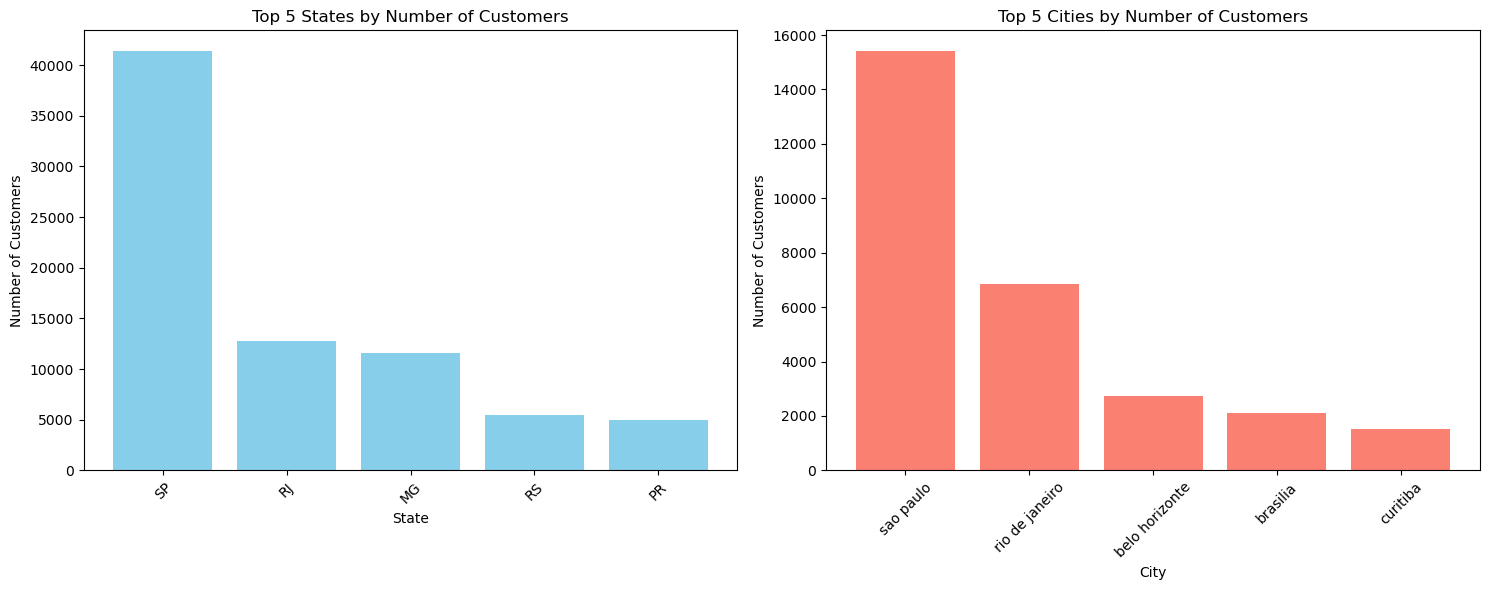

In [104]:

# Mengelompokkan data berdasarkan negara dan menghitung jumlah pelanggan
customer_counts_by_state = all_df.groupby(
    'customer_state')['customer_id'].nunique().reset_index()
top_5_states = customer_counts_by_state.sort_values(
    by='customer_id', ascending=False).head(5)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(top_5_states['customer_state'],
        top_5_states['customer_id'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 5 States by Number of Customers')
plt.xticks(rotation=45)

# Mengelompokkan data berdasarkan kota dan menghitung jumlah pelanggan
customer_counts_by_city = all_df.groupby(
    'customer_city')['customer_id'].nunique().reset_index()
top_5_cities = customer_counts_by_city.sort_values(
    by='customer_id', ascending=False).head(5)

plt.subplot(1, 2, 2)
plt.bar(top_5_cities['customer_city'],
        top_5_cities['customer_id'], color='salmon')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Top 5 Cities by Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pendapatan yang dihasilkan berdasarkan kota pelanggan?


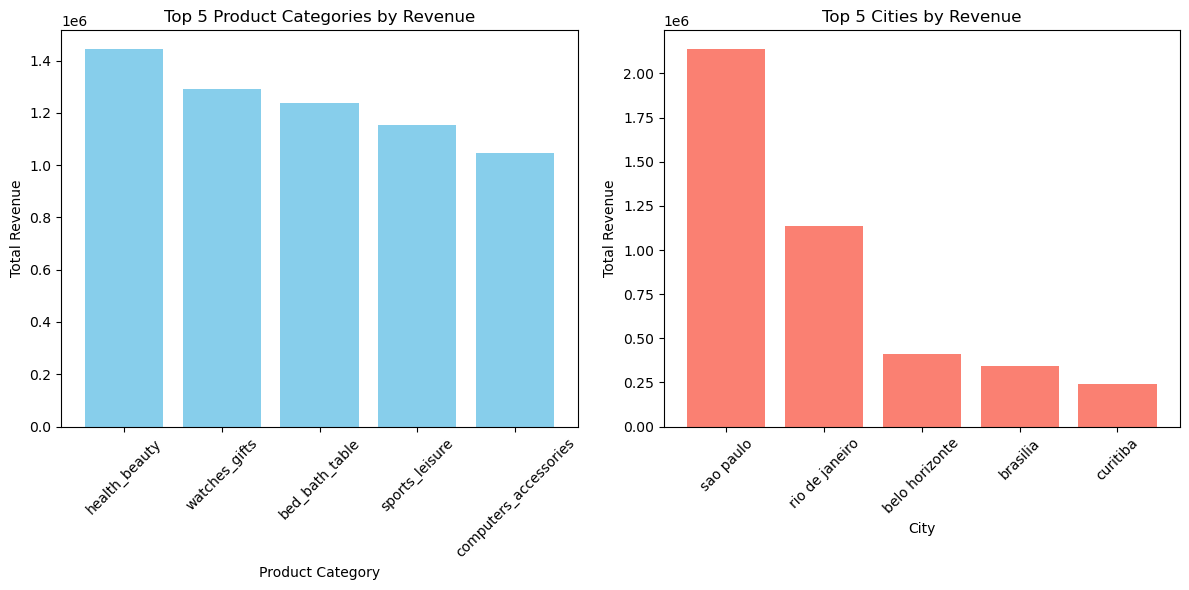

In [105]:
# Plot untuk lima kategori produk dengan pendapatan tertinggi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(revenue_by_categories.index,
        revenue_by_categories[('Revenue', 'sum')], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top 5 Product Categories by Revenue')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(revenue_by_city_df.index,
        revenue_by_city_df[('Revenue', 'sum')], color='salmon')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Top 5 Cities by Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 3: Apa saja top produk yang dijual dari masing-masing state?


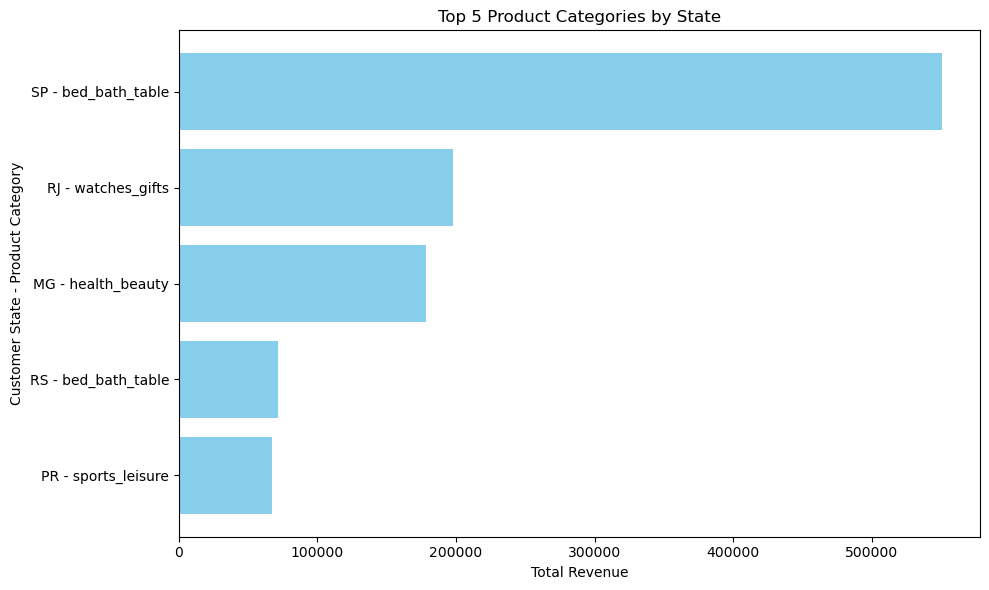

In [106]:
# Mendapatkan data untuk bar plot
categories = top_categories_by_state.index.get_level_values(1)
states = top_categories_by_state.index.get_level_values(0)
revenue_values = top_categories_by_state['Total Revenue']

plt.figure(figsize=(10, 6))
plt.barh(range(len(categories)),
         revenue_values[::-1], color='skyblue')

plt.xlabel('Total Revenue')
plt.ylabel('Customer State - Product Category')
plt.title('Top 5 Product Categories by State')

plt.yticks(range(len(categories)), [f'{state} - {category}' for state,
           category in zip(states[::-1], categories[::-1])])

plt.tight_layout()
plt.show()

### Pertanyaan 4: Apa metode pembayaran yang paling umum digunakan oleh pelanggan?


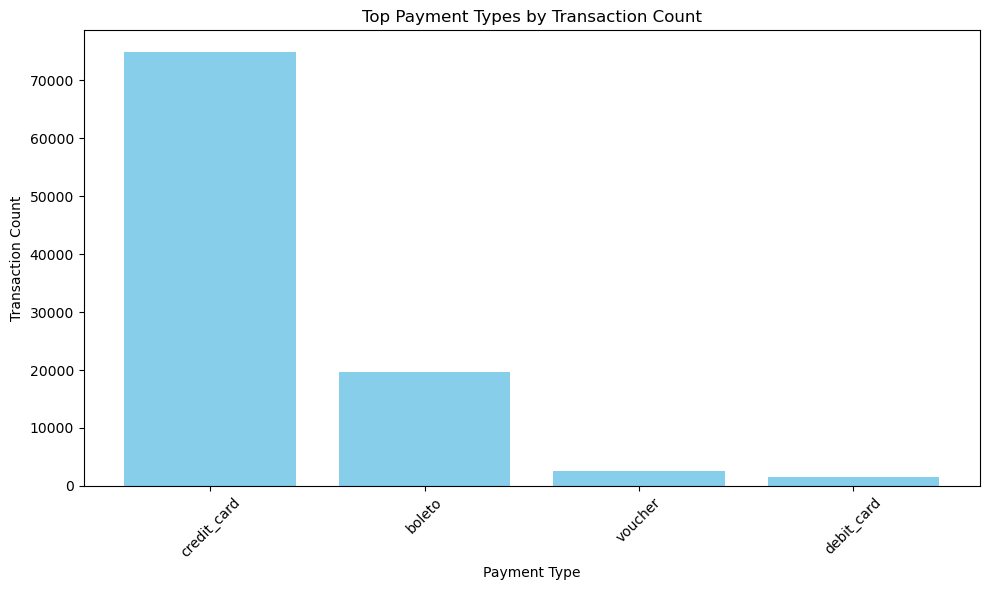

In [107]:
plt.figure(figsize=(10, 6))
plt.bar(payment_type_df['Payment Type'],
        payment_type_df['Transaction Count'], color='skyblue')

plt.xlabel('Payment Type')
plt.ylabel('Transaction Count')
plt.title('Top Payment Types by Transaction Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 5: Bagaimana tren pendapatan bulanan dari waktu ke waktu?


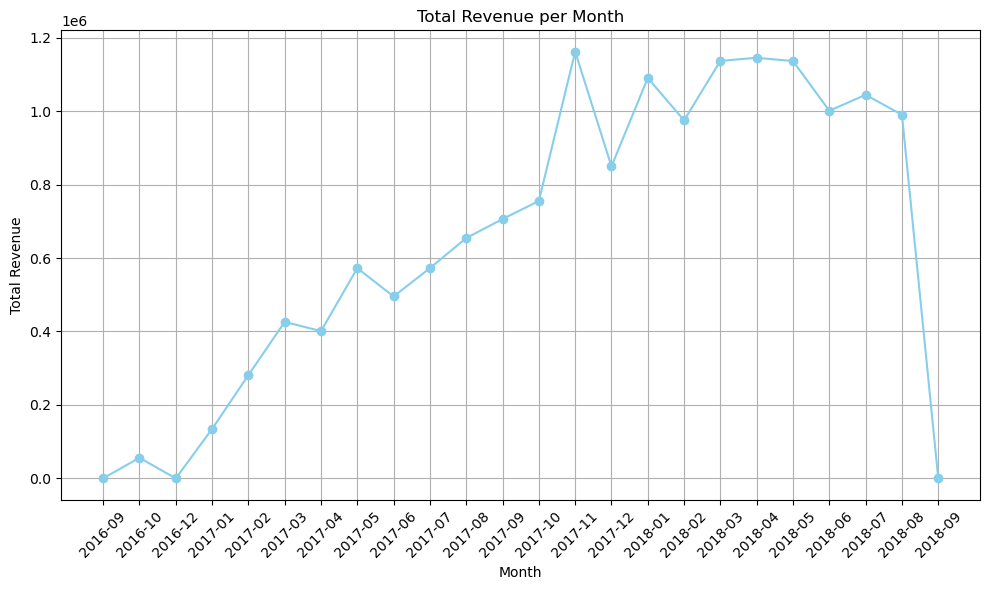

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_month.index.astype(str), revenue_per_month.values,
         marker='o', color='skyblue', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Month')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### Pertanyaan 6: Bagaimana rata-rata skor review untuk seluruh pesanan?

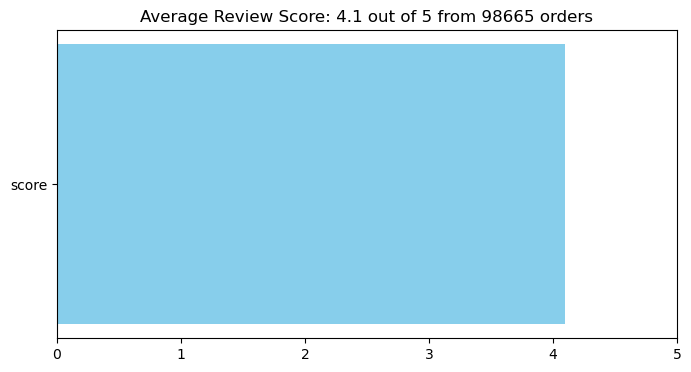

In [109]:
average_review_score_by_order = all_df.groupby('order_id')[
    'review_score'].mean()

score = round(total_average_review_score, 1)
order_ids = len(order_count_by_order_id)

plt.figure(figsize=(8, 4))

plt.barh('score', score, color='skyblue')

plt.xlim(0, 5)

plt.title(
    f'Average Review Score: {score} out of 5 from {order_ids} orders')

plt.show()

In [112]:
try:
    all_df.to_csv('dashboard/all_data.csv', index=False)
    print("CSV file saved successfully.")
except Exception as e:
    print("Error occurred while saving CSV file:", e)

CSV file saved successfully.


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2
- Conclution pertanyaan 3
- Conclution pertanyaan 4
- Conclution pertanyaan 5
- Conclution pertanyaan 6

